NOTE: This part of analysis is being done by Aman, it is still a work in progress. Muwei is doing other parts of analysis. Feel free to give us your inputs any changes, suggestions etc.

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

In [2]:
eng_jobs = pd.read_csv('./Scraper/engineering-jobs-job-results.csv')
finance_jobs = pd.read_csv('./Scraper/finance-jobs-job-results.csv')
it_jobs = pd.read_csv('./Scraper/it-jobs-job-results.csv')
market_jobs = pd.read_csv('./Scraper/marketing-jobs-job-results.csv')
jobs_category = [eng_jobs, finance_jobs, it_jobs, market_jobs]

In [3]:
eng_jobs.head()

,Name,Company,State,City,Salary,Location,Url
0,Product Engineer I,AeroVironment,CA,Simi Valley,$69k-$95k,"Simi Valley, CA",https://www.glassdoor.com/partner/jobListing.h...
1,Software Engineer - University Graduate,PayPal,CA,San Jose,$109k-$156k,"San Jose, CA",https://www.glassdoor.com/partner/jobListing.h...
2,Project Engineer,"LangCo NW, Inc.",WA,Oak Harbor,NaN,"Oak Harbor, WA",https://www.glassdoor.com/partner/jobListing.h...
3,Head of Engineering,Jovio,TX,Austin,$120k-$150k,"Austin, TX",https://www.glassdoor.com/partner/jobListing.h...
4,Senior Hardware Engineer,Scale Computing,IN,Indianapolis,NaN,"Indianapolis, IN",https://www.glassdoor.com/partner/jobListing.h...


In [4]:
finance_jobs.head()

,Name,Company,State,City,Salary,Location,Url
0,Finance Manager,Connecticut Conference of Municipalities,CT,New Haven,NaN,"New Haven, CT",https://www.glassdoor.com/partner/jobListing.h...
1,Finance Analyst,Positec,NC,Charlotte,$42k-$63k,"Charlotte, NC",https://www.glassdoor.com/partner/jobListing.h...
2,Financial Analyst,"The Concourse Group, LLC",MD,Annapolis,NaN,"Annapolis, MD",https://www.glassdoor.com/partner/jobListing.h...
3,Finance Manager,"OYSTER COVE BOAT WORKS & YACHT BROKERAGE, INC",VA,Gloucester,NaN,"Gloucester, VA",https://www.glassdoor.com/partner/jobListing.h...
4,Finance Manager,Waldorf Auto Group,MD,Waldorf,NaN,"Waldorf, MD",https://www.glassdoor.com/partner/jobListing.h...


In [5]:
it_jobs.head()

,Name,Company,State,City,Salary,Location,Url
0,IT Support Engineer,Audible,NJ,Newark,$49k-$82k,"Newark, NJ",https://www.glassdoor.com/partner/jobListing.h...
1,IT Helpdesk Analyst,Loop Recruiting,IN,Indianapolis,NaN,"Indianapolis, IN",https://www.glassdoor.com/partner/jobListing.h...
2,IT Consultant,Burton McCumber & Longoria,TX,Brownsville,NaN,"Brownsville, TX",https://www.glassdoor.com/partner/jobListing.h...
3,IT Support Technician,School Tech Team,IL,Oakbrook Terrace,NaN,"Oakbrook Terrace, IL",https://www.glassdoor.com/partner/jobListing.h...
4,Systems Administrator,Kansas City Managed IT,MO,Kansas City,$30k-$40k,"Kansas City, MO",https://www.glassdoor.com/partner/jobListing.h...


In [6]:
market_jobs.head()

,Name,Company,State,City,Salary,Location,Url
0,Marketing Coordinator,Ad Strategies,AZ,Scottsdale,$40k-$60k,"Scottsdale, AZ",https://www.glassdoor.com/partner/jobListing.h...
1,Entry Level Marketing & Advertising,Golden State Events,CA,Pleasanton,NaN,"Pleasanton, CA",https://www.glassdoor.com/partner/jobListing.h...
2,Marketing Manager,SourceOne Events,IL,Lombard,$40k-$50k,"Lombard, IL",https://www.glassdoor.com/partner/jobListing.h...
3,Marketing Coordinator,Human Supports of Idaho,ID,Boise,$14-$16,"Boise, ID",https://www.glassdoor.com/partner/jobListing.h...
4,Digital Marketing Consultant,The Design Group,SC,Charleston,NaN,"Charleston, SC",https://www.glassdoor.com/partner/jobListing.h...


In [9]:
# merge tables
merged_jobs = pd.concat(jobs_category, ignore_index=True, sort=False)
# drop duplicates
merged_jobs = merged_jobs.drop_duplicates()
merged_jobs = merged_jobs.reset_index(drop=True)

In [10]:
merged_jobs.head()

,Name,Company,State,City,Salary,Location,Url
0,Product Engineer I,AeroVironment,CA,Simi Valley,$69k-$95k,"Simi Valley, CA",https://www.glassdoor.com/partner/jobListing.h...
1,Software Engineer - University Graduate,PayPal,CA,San Jose,$109k-$156k,"San Jose, CA",https://www.glassdoor.com/partner/jobListing.h...
2,Project Engineer,"LangCo NW, Inc.",WA,Oak Harbor,NaN,"Oak Harbor, WA",https://www.glassdoor.com/partner/jobListing.h...
3,Head of Engineering,Jovio,TX,Austin,$120k-$150k,"Austin, TX",https://www.glassdoor.com/partner/jobListing.h...
4,Senior Hardware Engineer,Scale Computing,IN,Indianapolis,NaN,"Indianapolis, IN",https://www.glassdoor.com/partner/jobListing.h...


In [11]:
print("Total number of jobs scraped: {}".format(len(merged_jobs)))

Total number of jobs scraped: 3834


## Q.2(a) Which city in US offers the most job opportunities?

In [12]:
def compute_most_job_by_city(jobs, top=10):
    jobs = jobs[jobs['Location'] != "Remote"]
    #jobs['Location'] = jobs['Location'].apply(lambda x: x.split(", ")[0].lower())
    #gb = jobs.groupby('Location')
    gb = jobs.groupby('City')
    city_num = dict(gb.size())
    num_city = sorted([(v, k) for k,v in city_num.items()], key=lambda x: x[0], reverse=True)[:top]
    count = [x[0] for x in num_city]
    cities = [x[1].title().replace(" ", "\n") for x in num_city]
    
    return count, cities  

In [13]:
city_count, cities = compute_most_job_by_city(merged_jobs.copy())

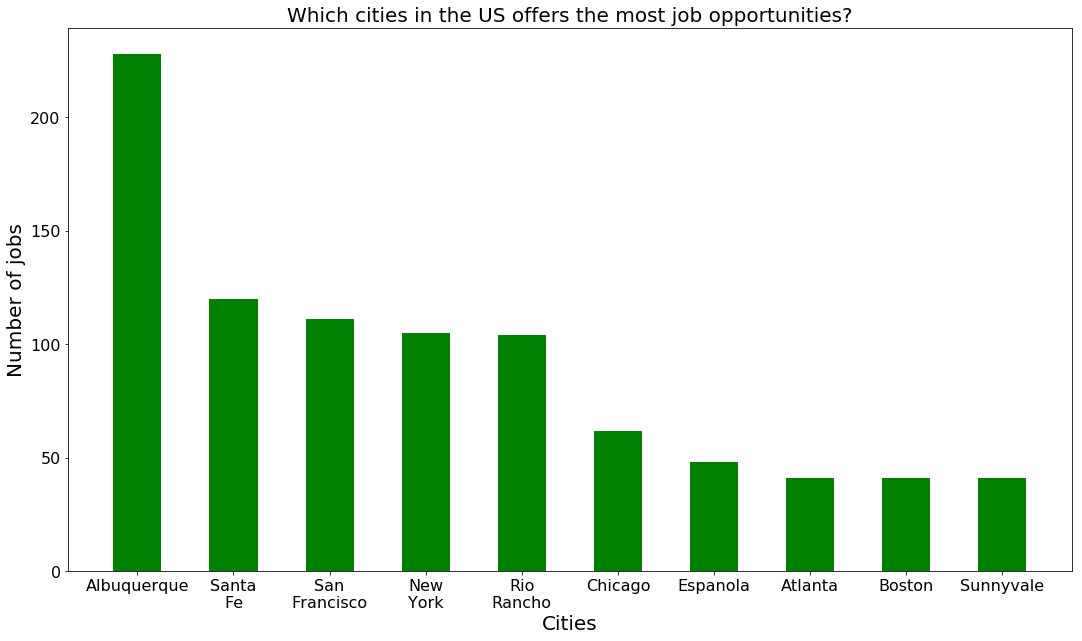

In [14]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(cities, city_count, facecolor="green", width=0.5)
ax.set_xlabel('Cities', fontsize=20)
ax.set_ylabel('Number of jobs', fontsize=20)
ax.set_title('Which cities in the US offers the most job opportunities?', fontsize=20)
ax.tick_params(labelsize=16)
#fig.savefig('image.png', format='png', dpi=300)

## Q.2(b) Which state in US offers the most job opportunities?

In [15]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [16]:
def compute_most_job_by_state(jobs, top=10):
    jobs = jobs[jobs['Location'] != "Remote"]
    #jobs['Location'] = jobs['Location'].apply(lambda x: x.split(" ")[-1])
    
    #gb = jobs.groupby('Location')
    gb = jobs.groupby('State')
    state_num = dict(gb.size())
    num_state = sorted([(v, k) for k,v in state_num.items()], key=lambda x: x[0], reverse=True)[:top]
    count = [x for x,_ in num_state]
    states = [x if len(abbrev_us_state[x])>10 else abbrev_us_state[x].replace(" ", "\n") for _,x in num_state]
    
    return count, states

In [17]:
count_state, states = compute_most_job_by_state(merged_jobs.copy())

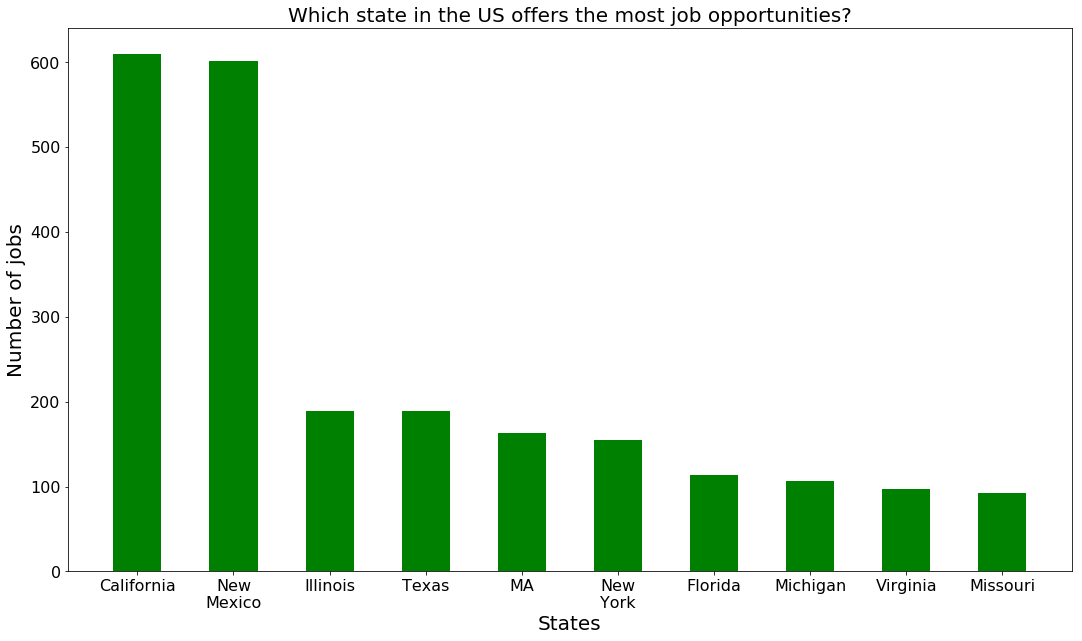

In [18]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(states, count_state, facecolor="green", width=0.5)
ax.set_xlabel('States', fontsize=20)
ax.set_ylabel('Number of jobs', fontsize=20)
ax.set_title('Which state in the US offers the most job opportunities?', fontsize=20)
ax.tick_params(labelsize=16)
#fig.savefig('image.png', format='png', dpi=300)

## Q.5(a) Which company offers the most number of jobs?

In [36]:
def compute_most_jobs_by_company(jobs, top=10):   
    gb = jobs.groupby('Company')
    comp_num = dict(gb.size())
    num_comp = sorted([(v, k) for k,v in comp_num.items()], key=lambda x: x[0], reverse=True)[:top]
    count = [x for x,_ in num_comp]
    comp = [x.title().replace(" ", "\n") for _,x in num_comp]
    
    return count, comp

In [37]:
count_comp, top_comp = compute_most_jobs_by_company(merged_jobs.copy())

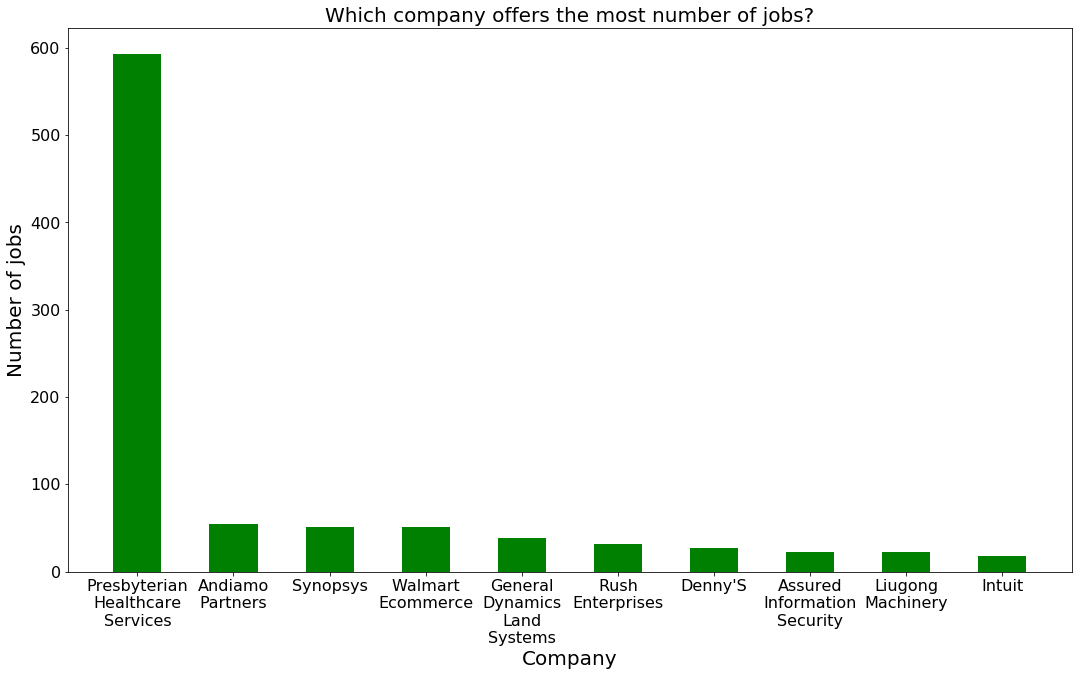

In [38]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(top_comp, count_comp, facecolor="green", width=0.5)
ax.set_xlabel('Company', fontsize=20)
ax.set_ylabel('Number of jobs', fontsize=20)
ax.set_title('Which company offers the most number of jobs?', fontsize=20)
ax.tick_params(labelsize=16)
#fig.savefig('image.png', format='png', dpi=300)

## Q.5(b) Which company offers a versatile portfolio of jobs?

In [40]:
def count_unique_titles_by_company(jobs, top=10):
    gb = jobs.groupby('Company')
    gb = gb.nunique(dropna=True).sort_values(ascending=False, by=['Name'])
    comp = gb.index[:top]
    titles = [gb.loc[idx, 'Name'] for idx in comp]
    comp = [x.title().replace(" ", "\n") for x in comp]
    
    return titles, comp
    

In [41]:
unique_titles, vcomp = count_unique_titles_by_company(merged_jobs.copy())

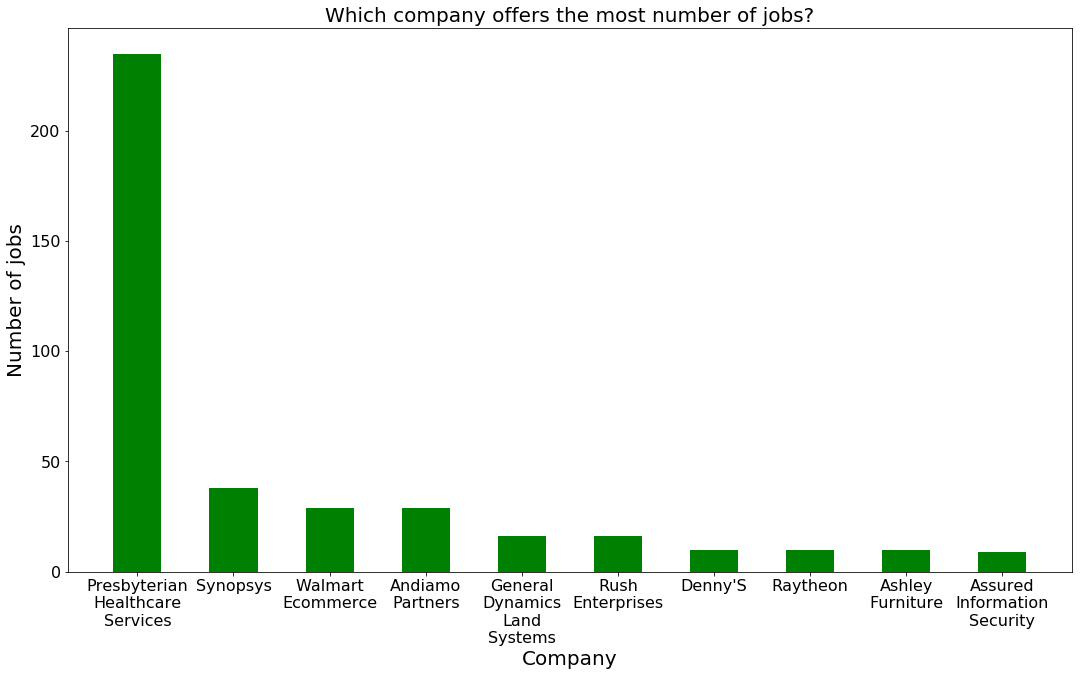

In [42]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.bar(vcomp, unique_titles, facecolor="green", width=0.5)
ax.set_xlabel('Company', fontsize=20)
ax.set_ylabel('Number of jobs', fontsize=20)
ax.set_title('Which company offers the most number of jobs?', fontsize=20)
ax.tick_params(labelsize=16)
#fig.savefig('image.png', format='png', dpi=300)